In [1]:
import numpy as np
import pandas as pd

In [2]:
import sklearn
from sklearn.datasets import load_boston
df = load_boston()

In [3]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston['MEDV'] = df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=5)
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (430, 13)
y_train Shape: (430,)
X_test Shape: (76, 13)
y_test Shape: (76,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
#fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#performance on training dataset 
y_train_pred = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("The model performance for training set:")
print("RMSE is {}".format(rmse))

The model performance for training set:
RMSE is 4.710901797319796


In [15]:
#performance on testing dataset
y_test_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("The model performance for testing set:")
print("RMSE is {}".format(rmse))

The model performance for testing set:
RMSE is 4.687543527902972


Text(0, 0.5, 'Predicted')

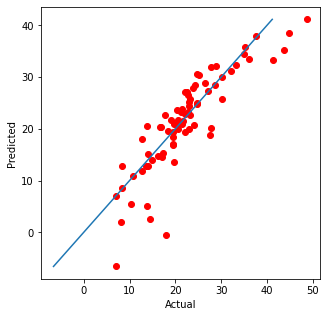

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_pred, color = 'r')
plt.plot([min(y_test_pred),max(y_test_pred)], [min(y_test_pred), max(y_test_pred)])
plt.xlabel('Actual')
plt.ylabel('Predicted')